In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')
print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [3]:
areas.isnull().any()

state            False
area (sq. mi)    False
dtype: bool

In [4]:
merged = pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [5]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [6]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [7]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [8]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [9]:
merged.describe(), areas.describe()

(              year    population
 count  2544.000000  2.524000e+03
 mean   2001.500000  6.805558e+06
 std       6.923547  2.855014e+07
 min    1990.000000  1.013090e+05
 25%    1995.750000  7.423805e+05
 50%    2001.500000  1.597005e+06
 75%    2007.250000  4.547104e+06
 max    2013.000000  3.161288e+08,
        area (sq. mi)
 count      52.000000
 mean    72892.288462
 std     95415.854873
 min        68.000000
 25%     34542.000000
 50%     55375.500000
 75%     83906.500000
 max    656425.000000)

In [10]:
merged.head(), areas.head()

(  state/region     ages  year  population    state
 0           AL  under18  2012   1117489.0  Alabama
 1           AL    total  2012   4817528.0  Alabama
 2           AL  under18  2010   1130966.0  Alabama
 3           AL    total  2010   4785570.0  Alabama
 4           AL  under18  2011   1125763.0  Alabama,
         state  area (sq. mi)
 0     Alabama          52423
 1      Alaska         656425
 2     Arizona         114006
 3    Arkansas          53182
 4  California         163707)

In [11]:
final = pd.merge(merged, areas, on='state', how='left')
final.describe()

,year,population,area (sq. mi)
count,2544.000000,2.524000e+03,2496.000000
mean,2001.500000,6.805558e+06,72892.288462
std,6.923547,2.855014e+07,94512.875699
min,1990.000000,1.013090e+05,68.000000
25%,1995.750000,7.423805e+05,34542.000000
50%,2001.500000,1.597005e+06,55375.500000
75%,2007.250000,4.547104e+06,83906.500000
max,2013.000000,3.161288e+08,656425.000000


In [12]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [13]:
final['state'][final['area (sq. mi)'].isnull()].unique()
final.dropna(inplace=True)
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
data=final[final.ages=='total']
data.head()

,state/region,ages,year,population,state,area (sq. mi)
1,AL,total,2012,4817528.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
5,AL,total,2011,4801627.0,Alabama,52423.0
6,AL,total,2009,4757938.0,Alabama,52423.0
9,AL,total,2013,4833722.0,Alabama,52423.0


In [15]:
# data.drop('state/region', axis=1)
list_states=data.state.unique()
map_dict={list_states[c]:c for c in range(len(list_states))}
data['state_encode']=data.state.map(map_dict)
data['density']=data.population/data['area (sq. mi)'] 

In [16]:
data2=final[((final.state=='Puerto Rico') | (final.state=='Alabama')) & (final.ages=='total')]
data2['density']=data2.population/data2['area (sq. mi)'] 
list_states=data.state.unique()
map_dict={list_states[c]:c for c in range(len(list_states))}
data2['state_encode']=data2.state.map(map_dict)
data2['density']=data2.population/data2['area (sq. mi)'] 
data2.head()

,state/region,ages,year,population,state,area (sq. mi),density,state_encode
1,AL,total,2012,4817528.0,Alabama,52423.0,91.897221,0
3,AL,total,2010,4785570.0,Alabama,52423.0,91.287603,0
5,AL,total,2011,4801627.0,Alabama,52423.0,91.593900,0
6,AL,total,2009,4757938.0,Alabama,52423.0,90.760506,0
9,AL,total,2013,4833722.0,Alabama,52423.0,92.206131,0


In [17]:
data.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
state_encode     False
density          False
dtype: bool

In [18]:
from sklearn import linear_model, metrics 
from sklearn.model_selection import train_test_split
X=data2.drop(['state','state/region','ages','population'],axis=1)
Y=data2.population

# splitting X and y into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 
print('train samples: ', len(X_train))
print('test samples: ', len(X_test))
  
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction, coeficient of determination (R^2) 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  

train samples:  30
test samples:  8
Coefficients: 
 [ 2.60610457e+04  1.89073713e+02  8.52428369e+03 -1.97161187e-01]
Variance score: 0.9902268608351349


In [19]:
reg.intercept_

-58316336.269977584

In [20]:
reg.predict(X_test)

array([4785010.28605731, 3867891.59284012, 4725784.10996974,
       4149563.51502308, 3757371.20908061, 3855207.48847964,
       4184544.78954432, 3755311.72637641])

In [21]:
np.sum(X_test.iloc[1]*np.asarray(reg.coef_))+reg.intercept_

3867891.5928401127

Text(0.5, 1.0, 'Training samples')

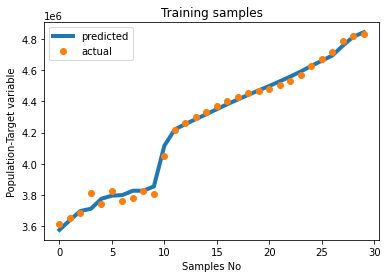

In [22]:
y_predicted=reg.predict(X_train)
y_temp=np.argsort(y_predicted)
plt.plot(np.arange(len(y_predicted)),y_predicted[y_temp],linewidth=4, label='predicted')
plt.plot(np.arange(len(y_predicted)),y_train.iloc[y_temp], 'o',label='actual')
plt.legend()
plt.xlabel('Samples No')
plt.ylabel('Population-Target variable')
plt.title('Training samples')

Text(0.5, 1.0, 'Test samples')

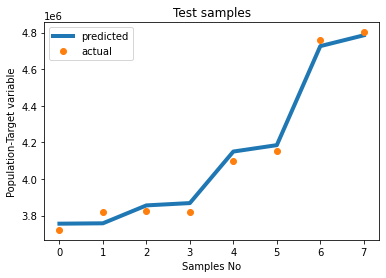

In [23]:
y_predicted=reg.predict(X_test)
y_temp=np.argsort(y_predicted)
plt.plot(np.arange(len(y_predicted)),y_predicted[y_temp], linewidth=4, label='predicted')
plt.plot(np.arange(len(y_predicted)),y_test.iloc[y_temp], 'o',label='actual')
plt.legend()
plt.xlabel('Samples No')
plt.ylabel('Population-Target variable')
plt.title('Test samples')

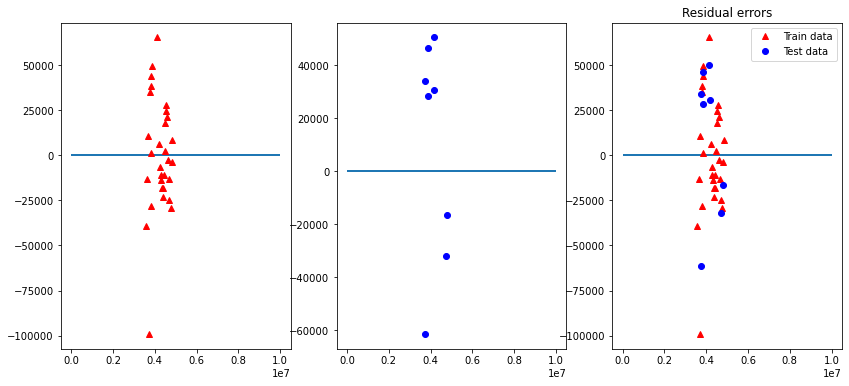

In [24]:
# plot for residual error 
plt.figure(figsize=(14,6))
## setting plot style 
# plt.style.use('fivethirtyeight')
plt.subplot(1,3,1)
  
## plotting residual errors in training data 
plt.plot(reg.predict(X_train), reg.predict(X_train) - y_train, 'r^' ,label = 'Train data') 
plt.hlines(y = 0, xmin = 0, xmax = 1e7, linewidth = 2) 

plt.subplot(1,3,2)  
## plotting residual errors in test data 
plt.plot(reg.predict(X_test), reg.predict(X_test) - y_test, 'bo' , label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 1e7, linewidth = 2) 

plt.subplot(1,3,3)
plt.plot(reg.predict(X_train), reg.predict(X_train) - y_train, 'r^' ,label = 'Train data') 
plt.plot(reg.predict(X_test), reg.predict(X_test) - y_test, 'bo' , label = 'Test data') 

## plotting legend 
plt.legend(loc = 0) 
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 1e7, linewidth = 2) 
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 